In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering #to make scatterplot
from scipy.cluster import hierarchy # to make dendogram

#### Plotting parameters

In [2]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

#specify the colormap  https://matplotlib.org/stable/gallery/color/colormap_reference.html
cmap_='tab20'


#specify marker size
s_ = 20

# Setup

In [3]:
X = []
with open('HW9data.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',',lineterminator='\n')
    for row in reader:
        if len(row)==2:
            X.append( [float(row[0]) , float(row[1]) ])

X = np.array(X)
print(X)

[[ 0.78  1.99]
 [ 0.02 -1.44]
 [ 0.62 -1.14]
 [ 1.52  0.54]
 [ 0.48 -2.43]
 [ 0.18 -3.12]
 [ 1.95 -0.81]
 [-0.64 -0.6 ]
 [ 1.35 -2.11]
 [-0.37  1.85]
 [ 1.39 -1.19]
 [ 0.24  2.02]
 [ 0.45 -1.14]
 [-0.48  0.32]
 [ 0.39 -2.27]
 [ 0.22 -0.99]
 [ 1.57  1.3 ]
 [-0.43 -0.5 ]
 [-1.51  1.06]
 [-0.2  -1.17]
 [ 1.25 -3.17]
 [-0.11  2.08]
 [-1.66  0.6 ]
 [ 1.6  -3.06]
 [ 1.7   0.21]
 [ 1.08 -2.39]
 [ 0.04 -0.07]
 [-0.8  -1.06]
 [-2.22  0.12]
 [ 0.19 -0.93]
 [ 2.16 -1.55]
 [-1.43  1.21]
 [ 0.92 -2.22]
 [ 1.95  0.86]
 [-0.82 -1.38]
 [ 0.64  2.32]
 [-1.76  1.1 ]
 [ 1.57 -0.36]
 [ 0.85  1.12]
 [ 0.52  0.06]
 [-0.13 -3.11]
 [ 0.89 -1.14]
 [ 1.75 -2.49]
 [-0.31 -1.64]
 [-1.27  1.75]
 [ 2.01  0.08]
 [-0.67 -1.15]
 [-1.13 -0.39]
 [ 0.24 -2.36]
 [ 0.53 -2.45]
 [ 1.71 -1.87]
 [-0.66 -0.04]
 [ 1.66 -2.29]
 [ 1.6  -2.58]
 [ 1.15 -2.27]
 [ 1.03 -1.85]
 [ 1.75 -2.28]
 [ 1.49 -1.4 ]
 [-0.61 -1.26]
 [ 0.92  1.15]
 [ 0.5  -0.46]
 [ 0.56 -0.97]
 [ 0.15 -0.64]
 [-0.59 -1.14]
 [ 0.83 -2.85]
 [-0.2  -0.79]
 [ 0.04  2

#  Scatter plot 

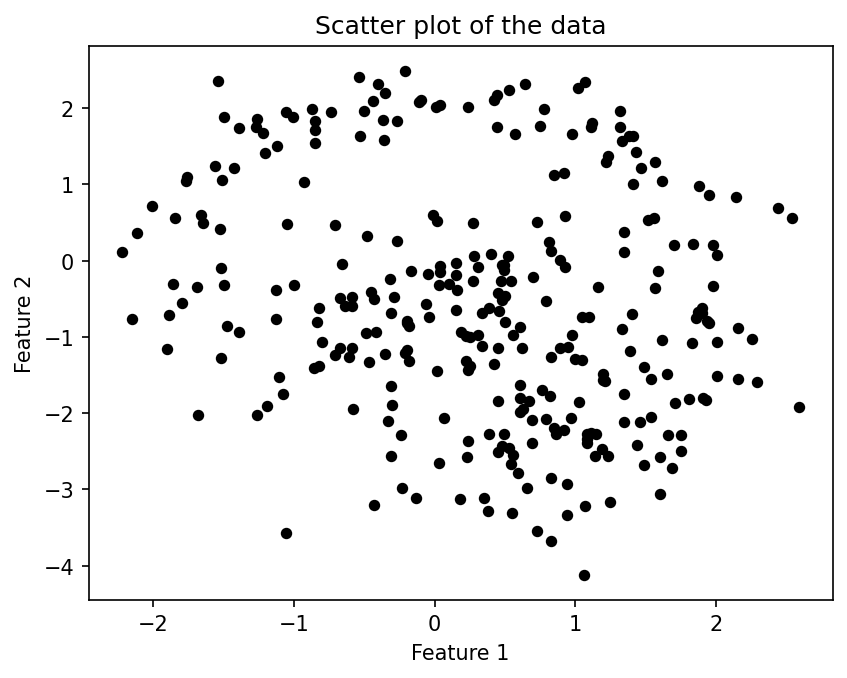

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=s_,color='k')

plt.title('Scatter plot of the data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
    
plt.show()

# K means 

#### Scatter plot

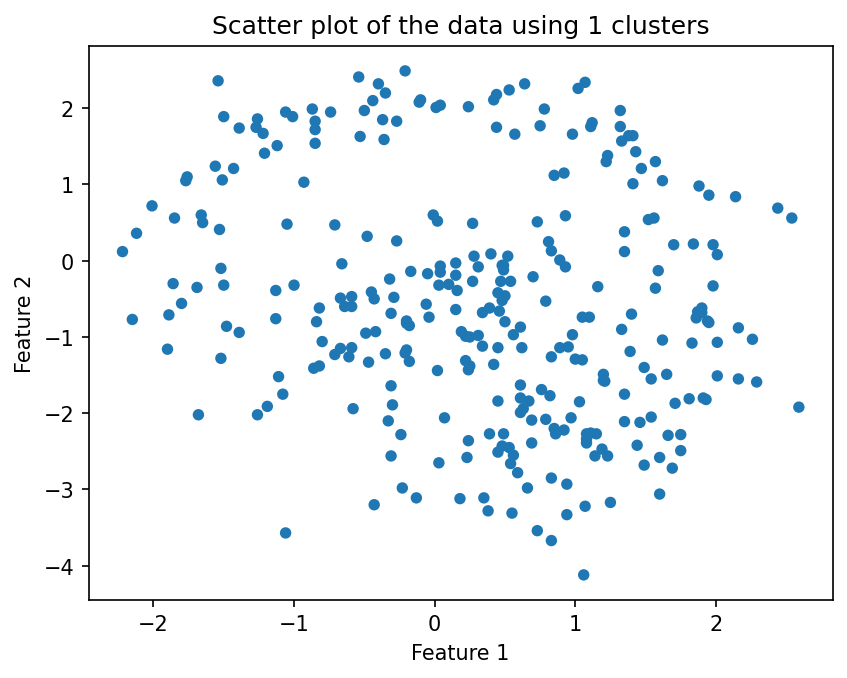

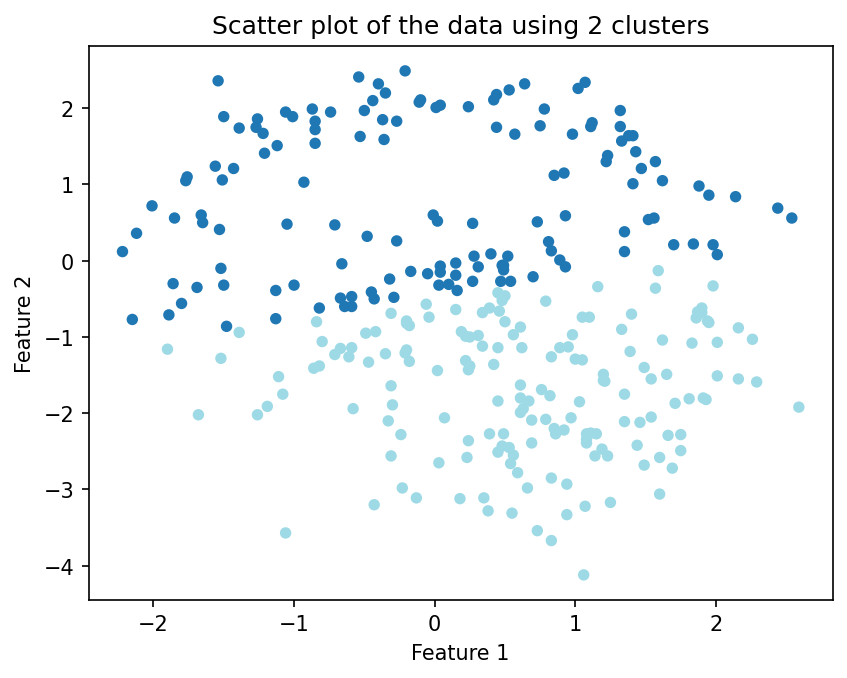

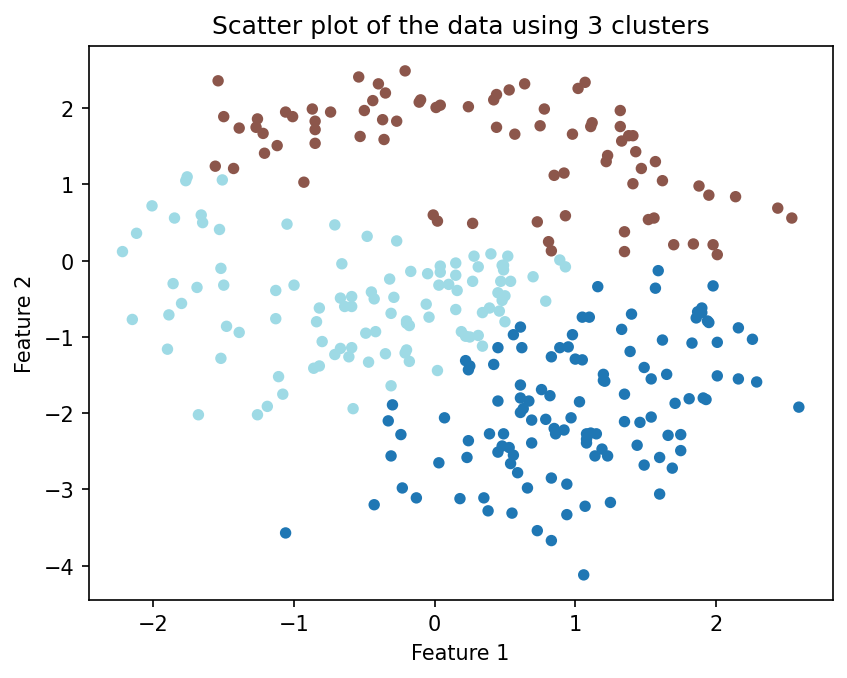

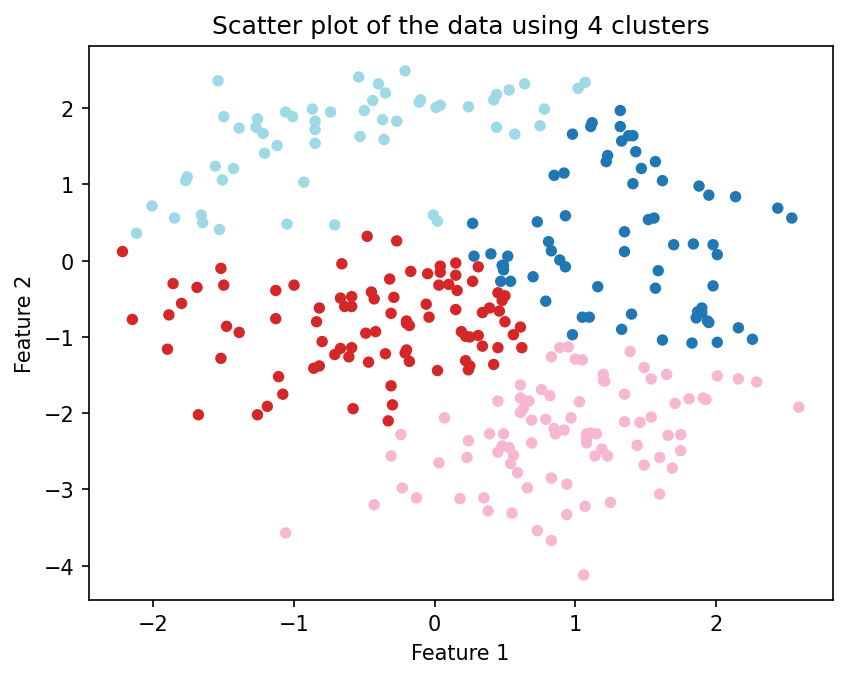

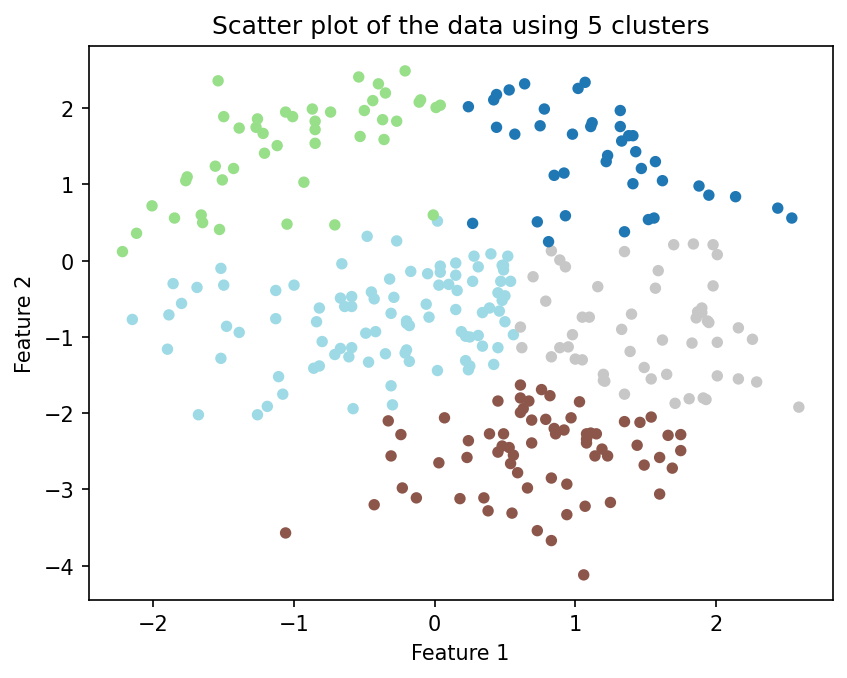

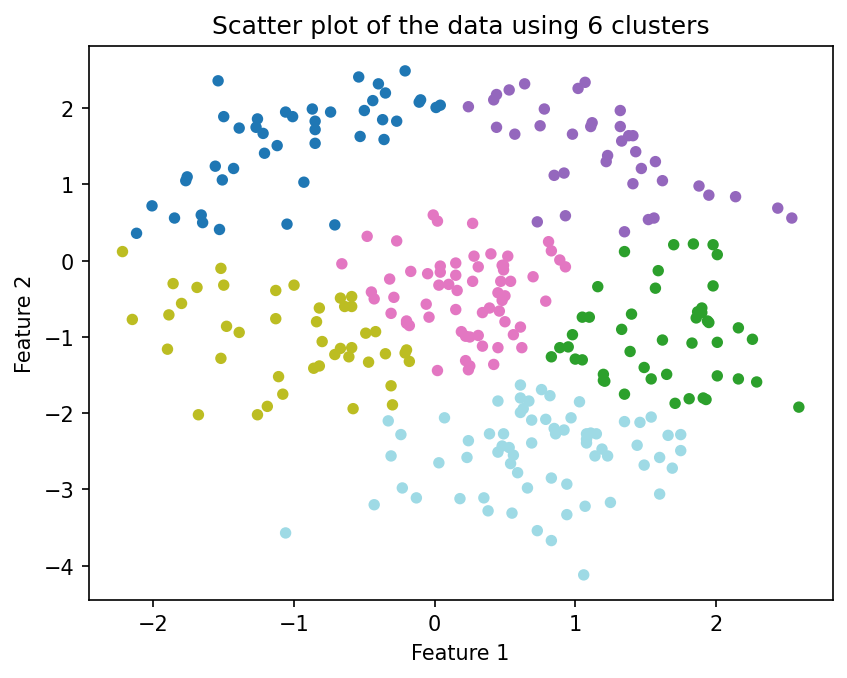

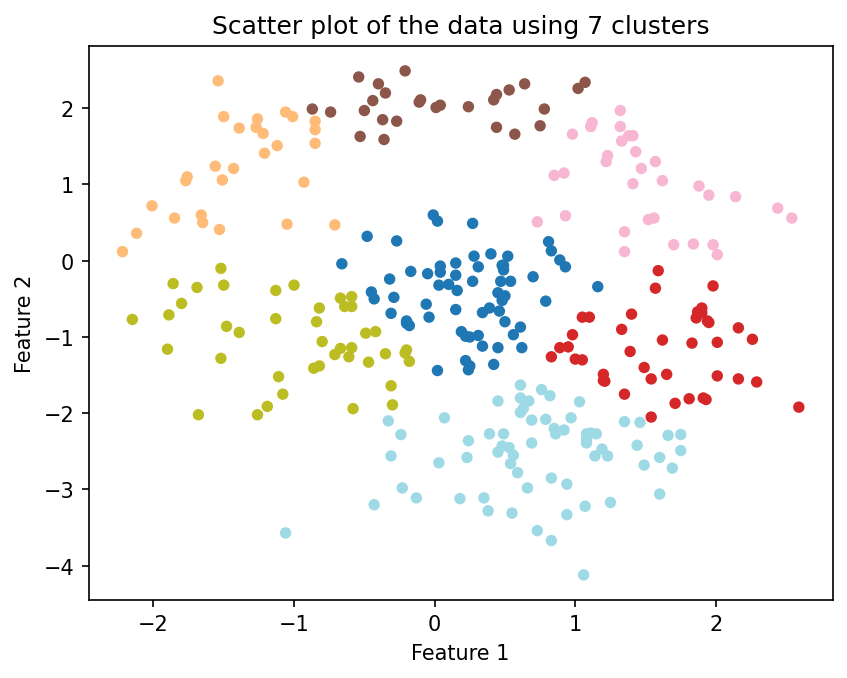

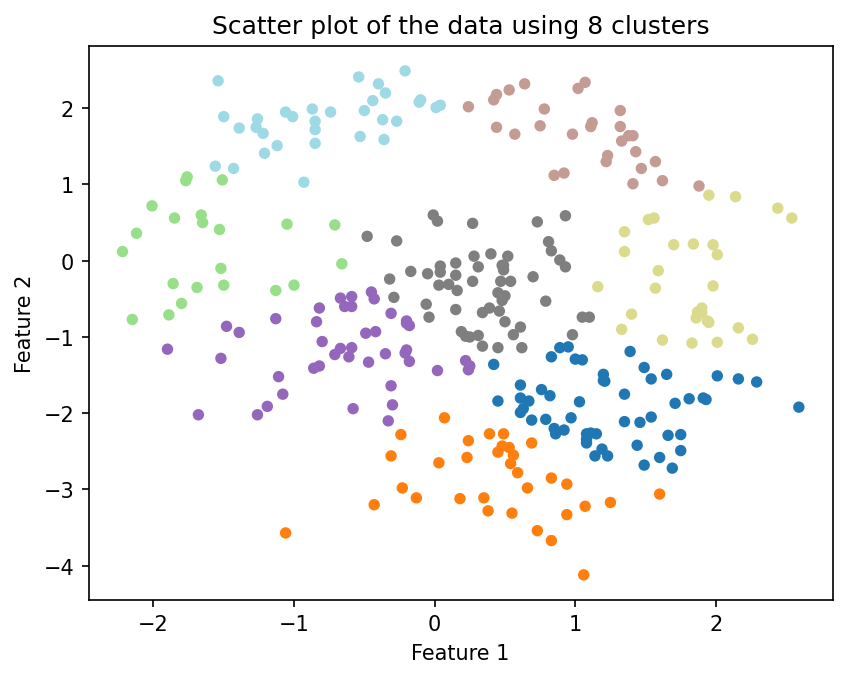

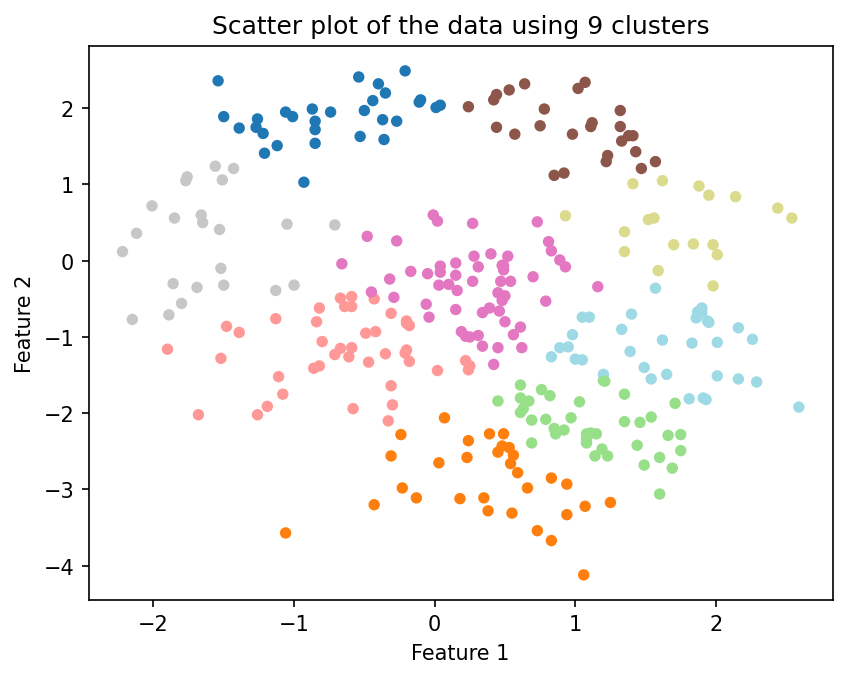

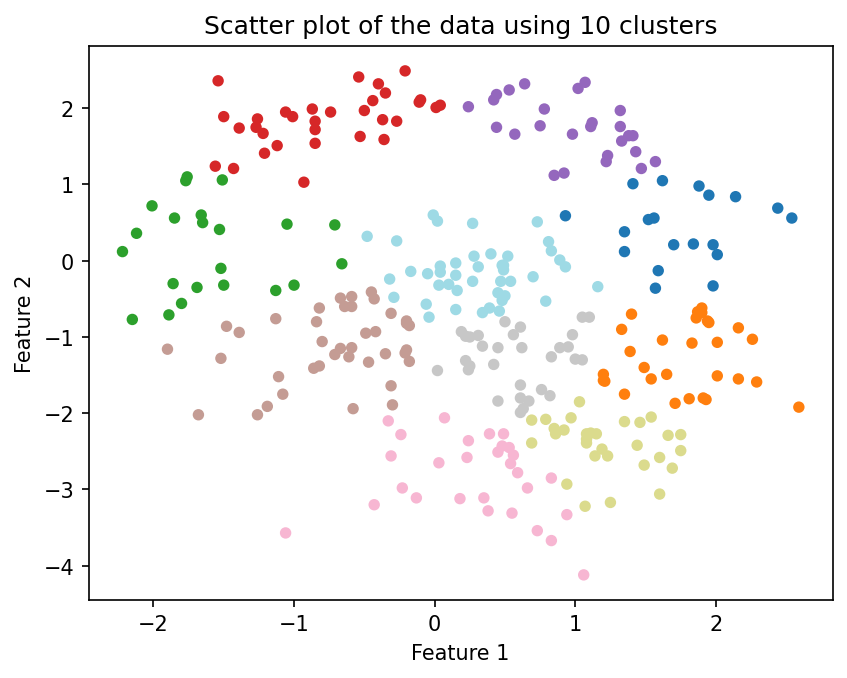

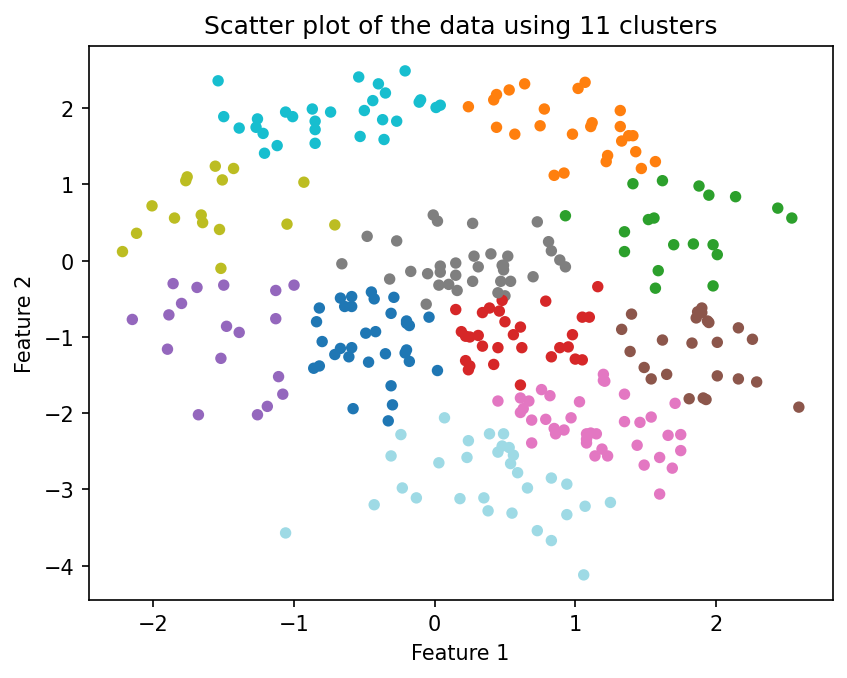

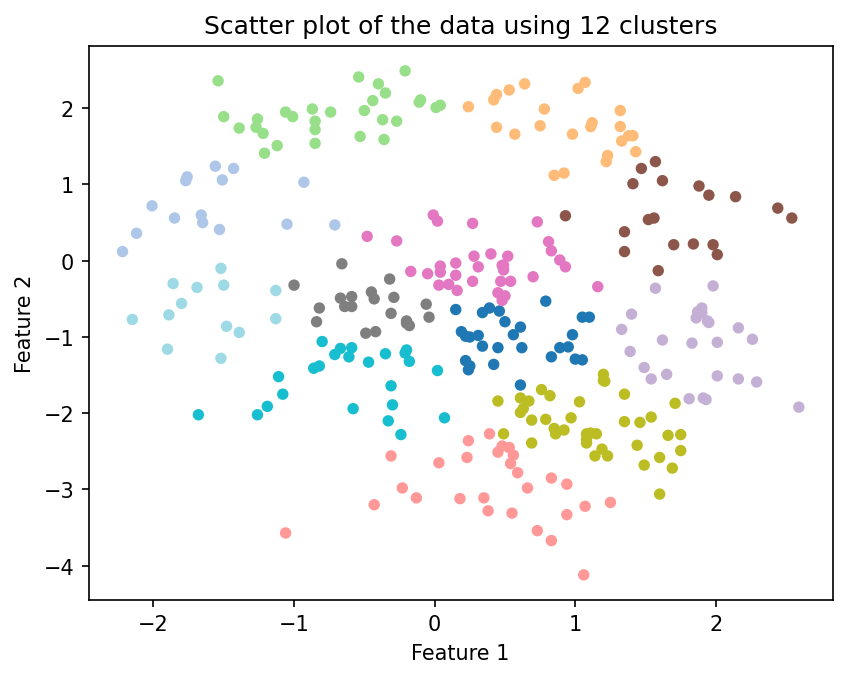

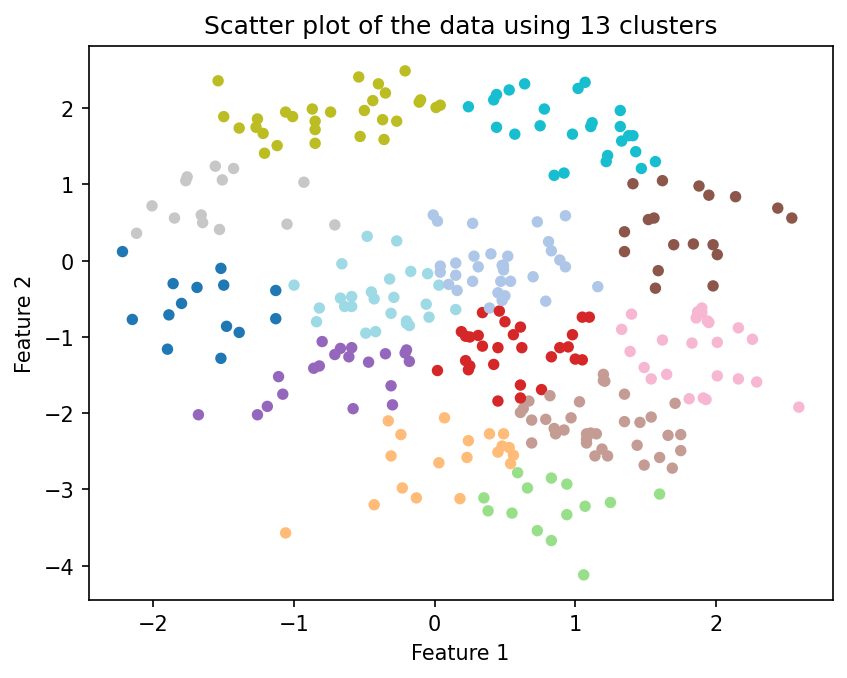

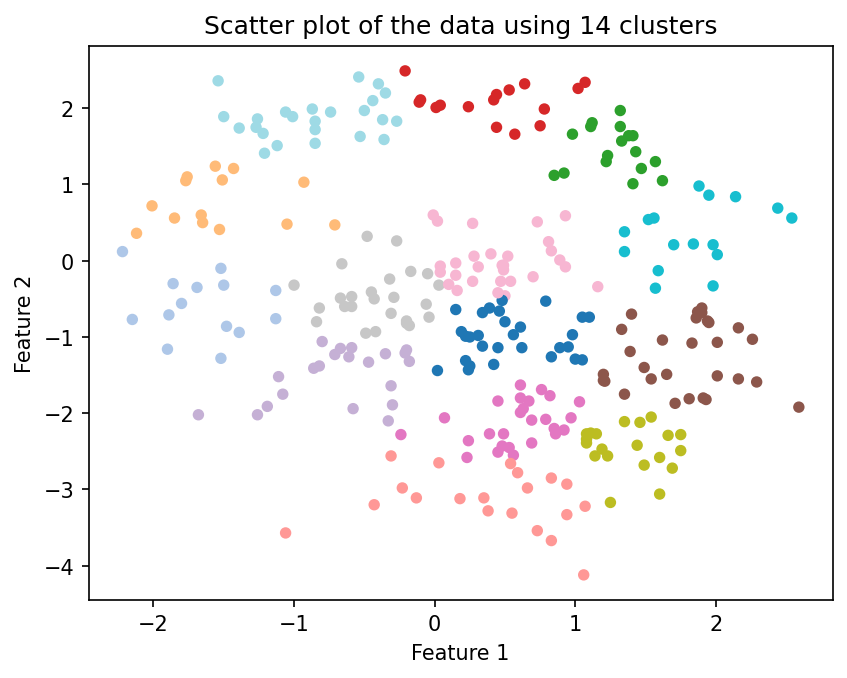

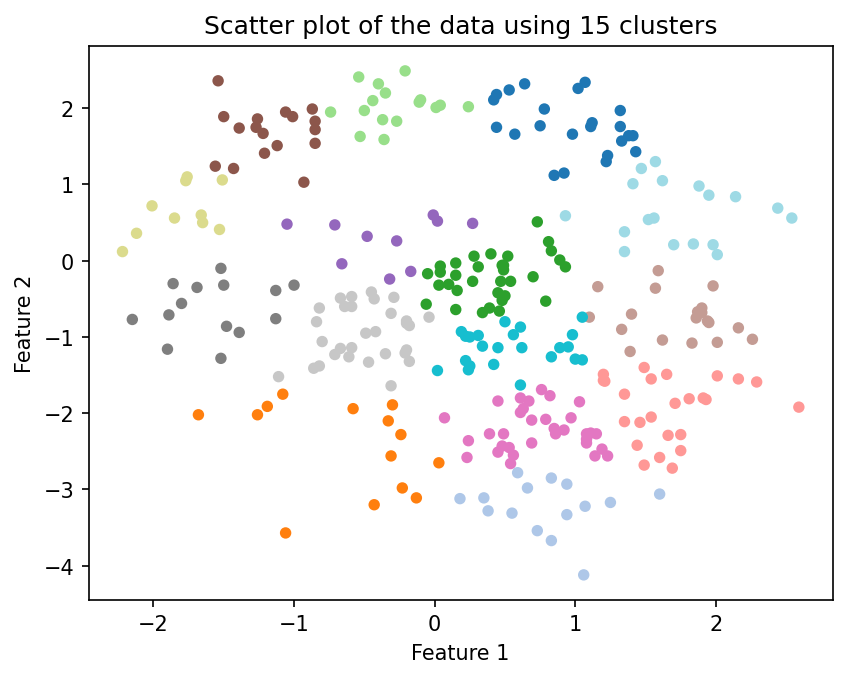

In [6]:
for i in range(1,16):
    clustering = KMeans(n_clusters=i, n_init=50, max_iter=250, init='random')
    clustering.fit(X)
    
    # Plot the clusters 
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], s=s_,c=clustering.labels_,cmap=cmap_)
    plt.title('Scatter plot of the data using %i clusters'%(i))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.show()

# Hierarchical (Agglomerative) Clustering 

First we will make a dendogram, then pick a distance threshold to make a scatter plot

### Single linkage (cluster distance = min pairwise distance)

#### Dendogram

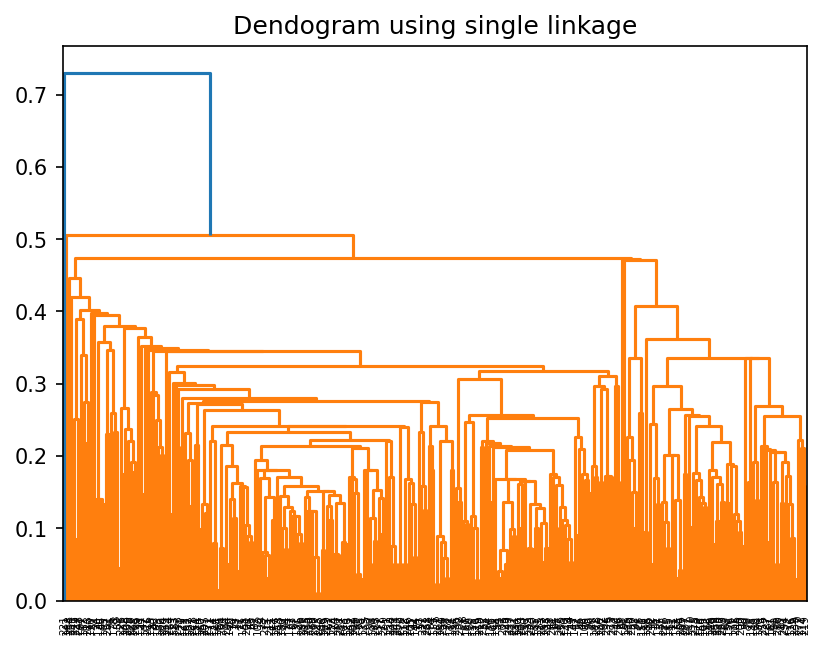

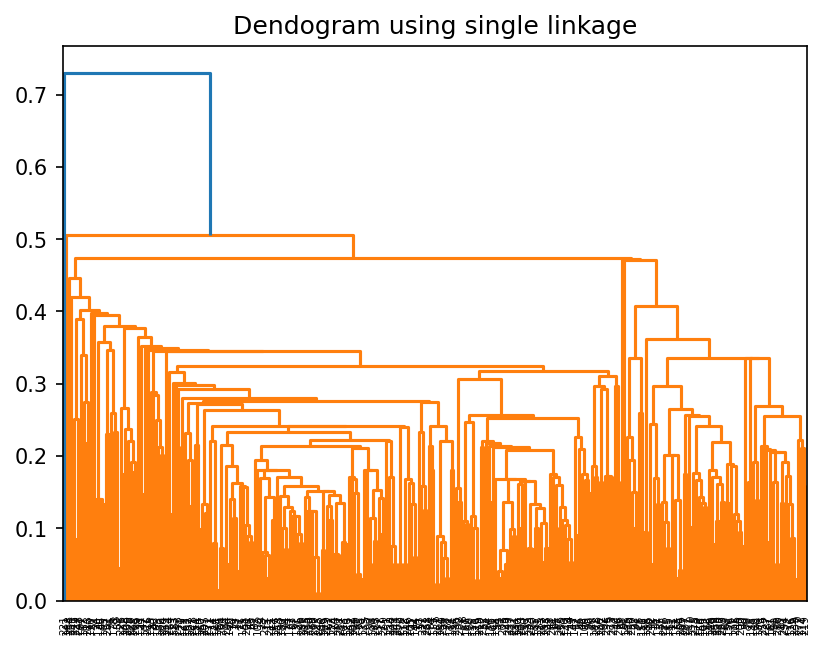

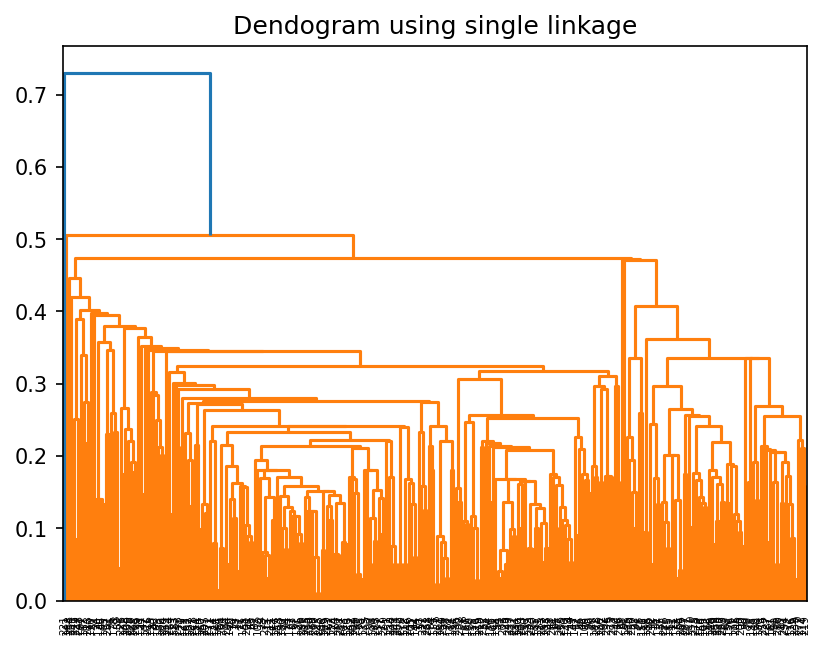

In [12]:
link = 'single'

Xlink = hierarchy.linkage(X, link)
plt.figure()
plt.title('Dendogram using %s linkage'%(link))
dn = hierarchy.dendrogram(Xlink)
plt.show()

#### Scatter plot

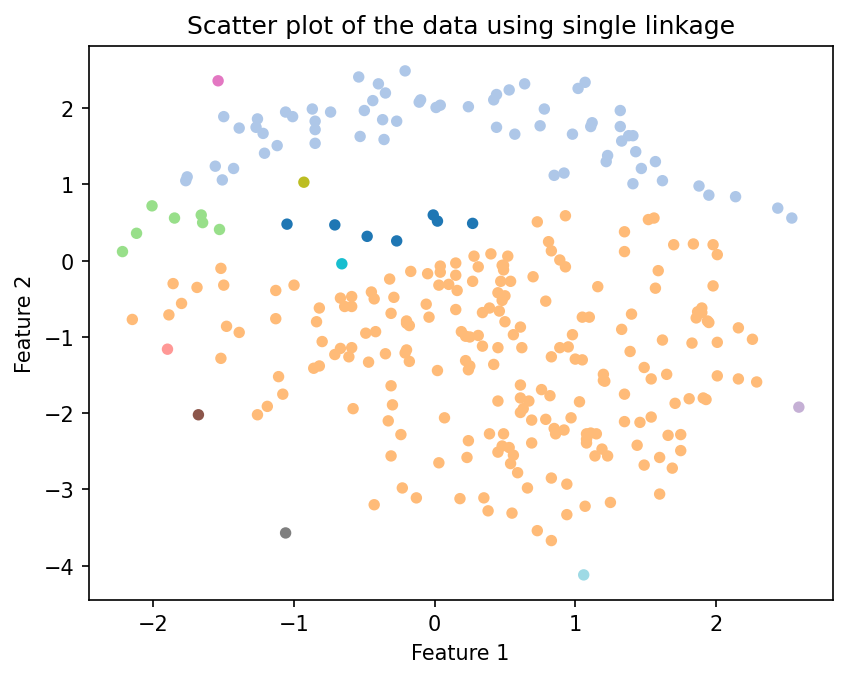

In [13]:
thresh=0.39

clustering = AgglomerativeClustering(n_clusters=None, \
                     affinity='euclidean',linkage=link, \
                     distance_threshold=thresh,compute_full_tree=True)

clustering.fit(X)

# Plot the clusters 
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=s_,c=clustering.labels_,cmap=cmap_)
plt.title('Scatter plot of the data using %s linkage'%(link))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

### Average linkage (cluster distance = mean pairwise distance)

#### Dendogram

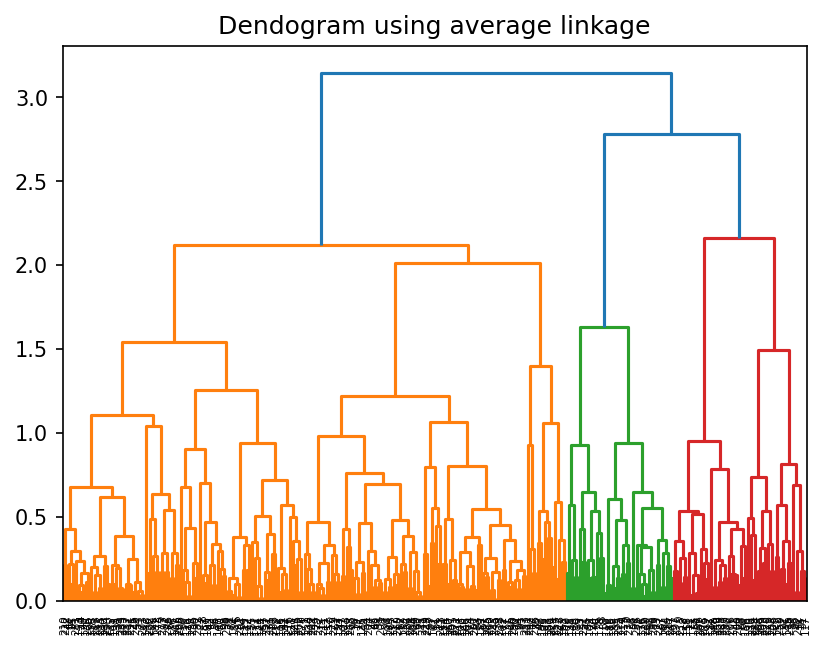

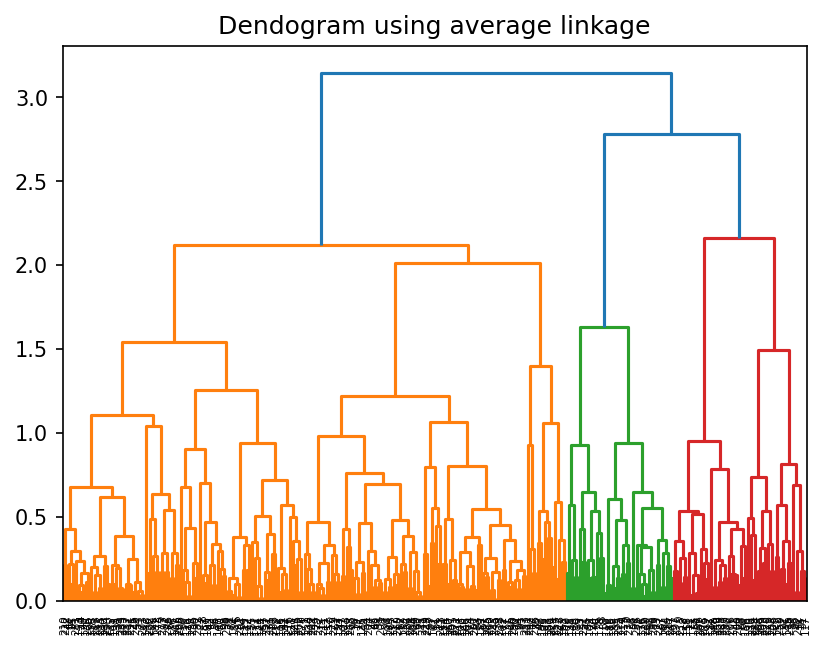

In [15]:
link = 'average'
Xlink = hierarchy.linkage(X, link)
plt.figure()
plt.title('Dendogram using %s linkage'%(link))
dn = hierarchy.dendrogram(Xlink)
plt.show()

#### Scatter plot

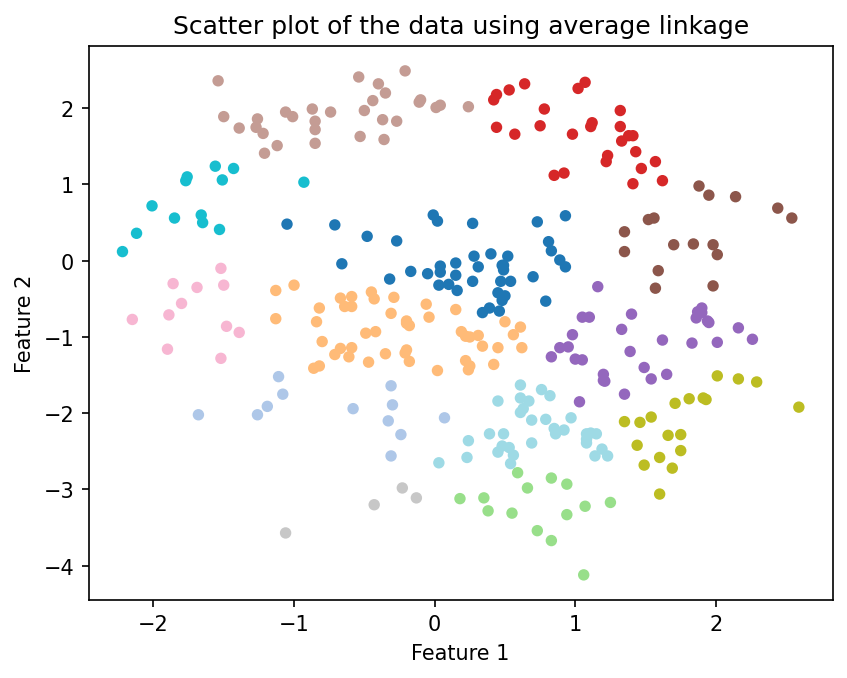

In [16]:
thresh=1.1

clustering = AgglomerativeClustering(n_clusters=None, \
                     affinity='euclidean',linkage=link, \
                     distance_threshold=thresh,compute_full_tree=True)

clustering.fit(X)

# Plot the clusters
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=20,c=clustering.labels_,cmap=cmap_)
plt.title('Scatter plot of the data using %s linkage'%(link))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

### Complete linkage (cluster distance = max pairwise distance)

#### Dendogram

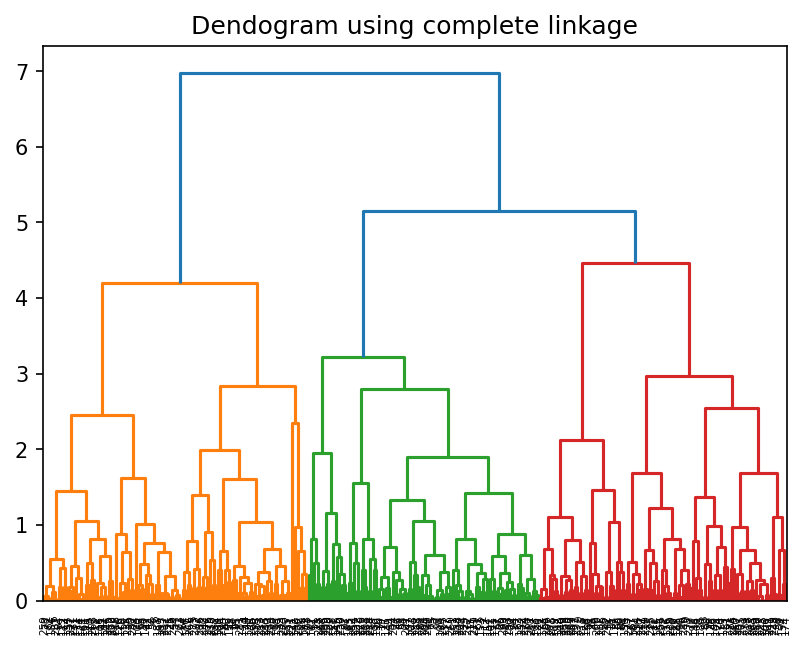

In [5]:
link = 'complete'
Xlink = hierarchy.linkage(X, link)
plt.figure()
plt.title('Dendogram using %s linkage'%(link))
dn = hierarchy.dendrogram(Xlink)
plt.show()

#### Scatter plot

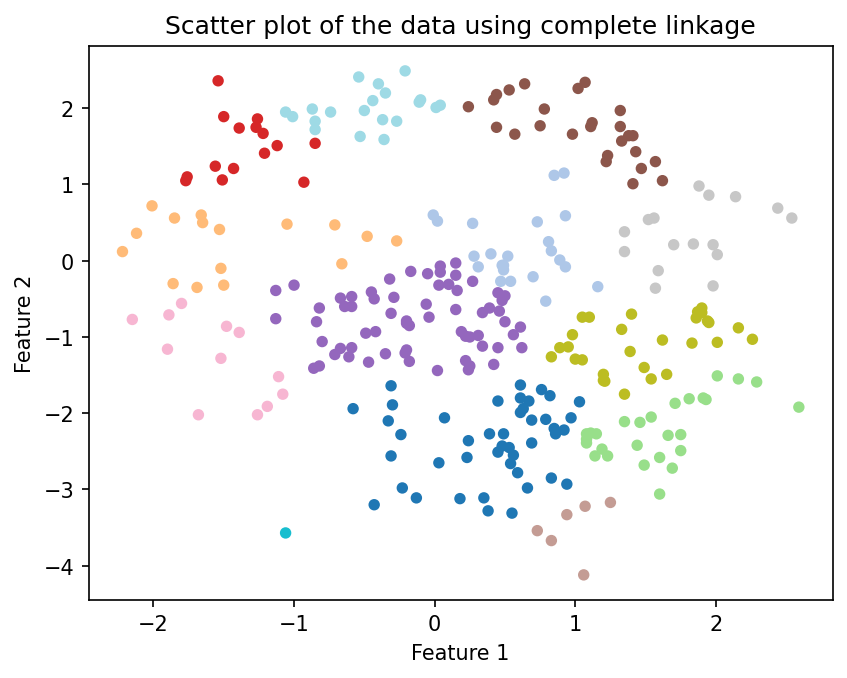

In [6]:
thresh=2.0

clustering = AgglomerativeClustering(n_clusters=None, \
                     affinity='euclidean',linkage=link, \
                     distance_threshold=thresh,compute_full_tree=True)

clustering.fit(X)

# Plot the clusters 
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=20,c=clustering.labels_,cmap=cmap_)
plt.title('Scatter plot of the data using %s linkage'%(link))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()